In [1]:
from sklearn.datasets import load_wine
data = load_wine()
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
x = data['data']
y = data['target'] 

In [4]:
df = pd.DataFrame(x, columns=data['feature_names'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [6]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

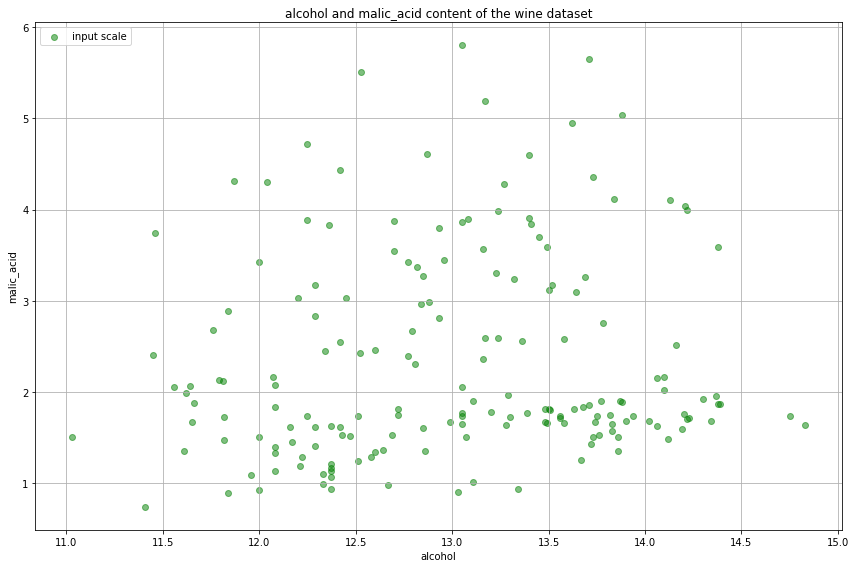

In [7]:
plt.figure(figsize=(12,8))

plt.scatter(df['alcohol'], df['malic_acid'],
        color='green', label='input scale', alpha=0.5)
plt.title('alcohol and malic_acid content of the wine dataset')
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.legend(loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

In [8]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


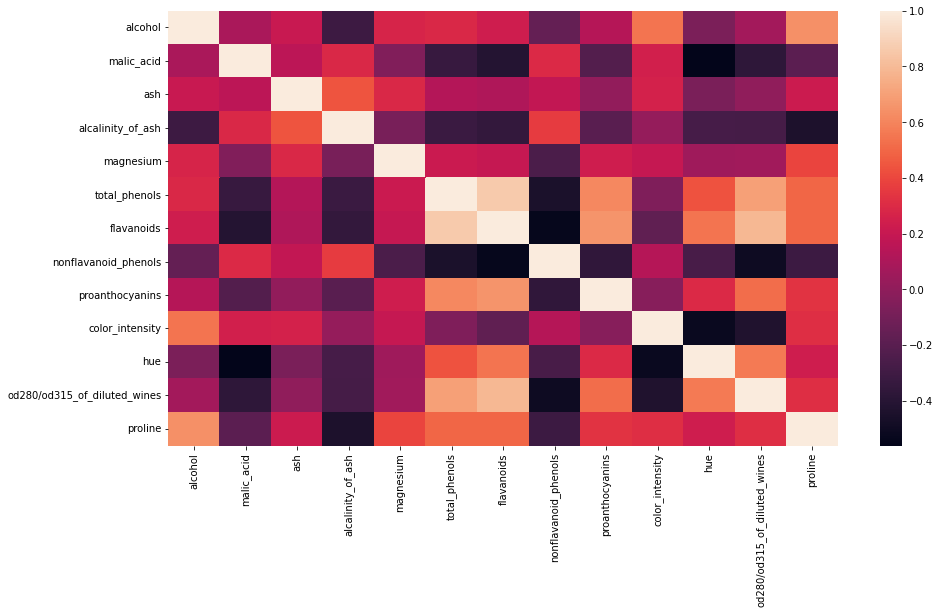

In [9]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr())

In [10]:
df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


Wysokie korelacje czyli powyżej 0,75  to flavanoids - od280/od315_of_diluted_wines (0,78) i total_phenols - flavanoids


In [20]:
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [16]:
#skalowanie 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [18]:
x_train, x_test,y_train, y_test = train_test_split(x_scaled,data["target"], test_size=0.2)

In [21]:
#dostosowywanie danych
y_train = y_train.reshape(-1, 1)
y_train = OneHotEncoder(sparse=False).fit_transform(y_train)
y_test = y_test.reshape(-1, 1)
y_test = OneHotEncoder(sparse=False).fit_transform(y_test)

In [22]:
#architektura modelu

def create_model(X, units, opt, n_n):
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(input_shape = X.shape[1]))
    
    for i, j in enumerate(units):
        model.add(layers.Dense(j, activation = 'relu', name = str(i+1)))
    
    model.add(layers.Dense(n_n))
    model.add(layers.Softmax())
           
    print(model.summary())
          
    model.compile(optimizer = opt,
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])   
    return model

In [29]:
learning_rate = 0.01
batch_size=256
epochs = 20
patience = 5

In [30]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Layer
from tensorflow.keras import Model
from tensorflow.keras.activations import relu,sigmoid, softmax, tanh

In [31]:
optimizer = tf.keras.optimizers.Adam(learning_rate= learning_rate)
model = create_model(x_train, [32,16], optimizer, 3)


history = model.fit(
    x_train, 
    y_train,
    epochs = epochs,
    validation_data = (x_test, y_test),
    callbacks=[
        keras.callbacks.EarlyStopping(patience=patience)
    ]
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1 (Dense)                   (None, 32)                448       
                                                                 
 2 (Dense)                   (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
 softmax_1 (Softmax)         (None, 3)                 0         
                                                                 
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
5/5 [==============================] - 1s 52ms/step - loss: 0.8984 - accuracy: 0.5775 - val_loss: 0.5187 - val_accuracy: 0.8889
Epoch 2/20
5/5 [========================

In [32]:
#widać że model szybko się uczy i wręcz przeucza 

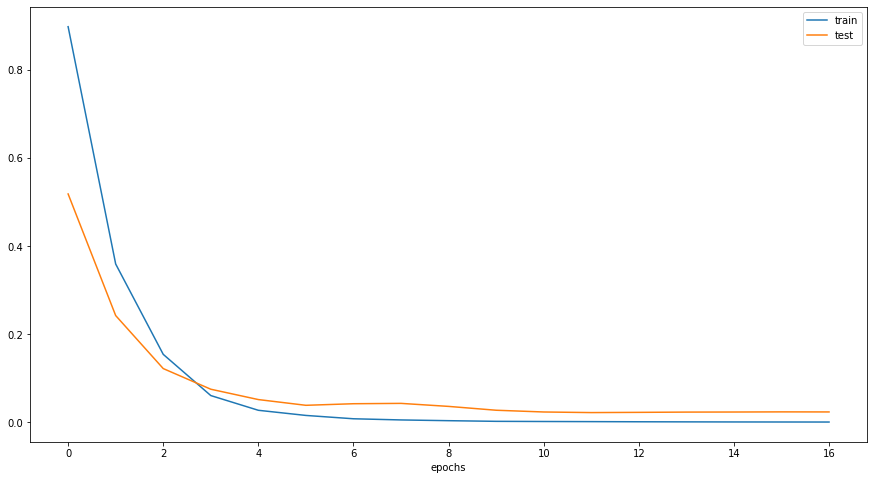

In [34]:
#wykresy 
plt.figure(figsize= (15,8))
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [35]:
#po drugiej epoce widać wyraźne wypłaszczenie 

In [37]:
model.predict(x_test)
y_pred=model.predict(x_test).argmax(axis=1)
print(classification_report(y_test.argmax(axis=1), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.97        15
           2       0.90      1.00      0.95         9

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



In [38]:
#różna warianty dla modelu
learning_rate = [0.01, 0.001]
epochs = [5, 10, 20]
patience = [3,5]

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1 (Dense)                   (None, 32)                448       
                                                                 
 2 (Dense)                   (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
 softmax_3 (Softmax)         (None, 3)                 0         
                                                                 
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
5/5 [==============================] - 1s 58ms/step - loss: 0.9063 - accuracy: 0.6197 - val_loss: 0.5160 - val_accuracy: 1.0000
Epoch 2/5
5/5 [==========================

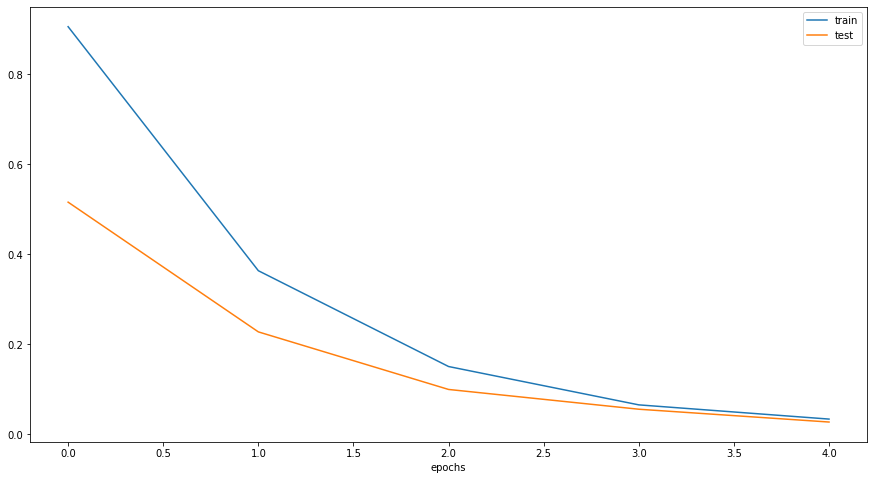

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1 (Dense)                   (None, 32)                448       
                                                                 
 2 (Dense)                   (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 3)                 51        
                                                                 
 softmax_4 (Softmax)         (None, 3)                 0         
                                                                 
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
5/5 [==============================] - 1s 57ms/step - loss: 1.0429 - accuracy: 0.3944 - val_loss: 0.6910 - val_accuracy: 0.7500
Epoch 2/5
5/5 [==========================

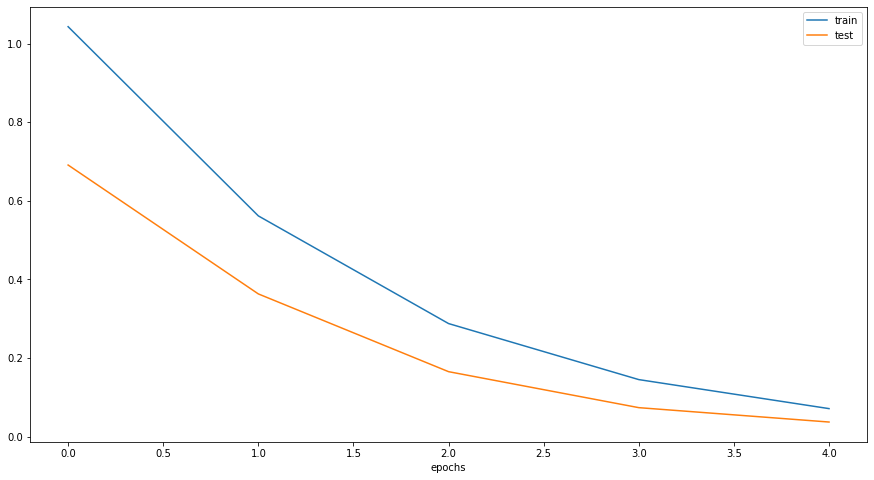

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1 (Dense)                   (None, 32)                448       
                                                                 
 2 (Dense)                   (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 3)                 51        
                                                                 
 softmax_5 (Softmax)         (None, 3)                 0         
                                                                 
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
5/5 [==============================] - 1s 56ms/step - loss: 0.8825 - accuracy: 0.6761 - val_loss: 0.5967 - val_accuracy: 0.8611
Epoch 2/10
5/5 [========================

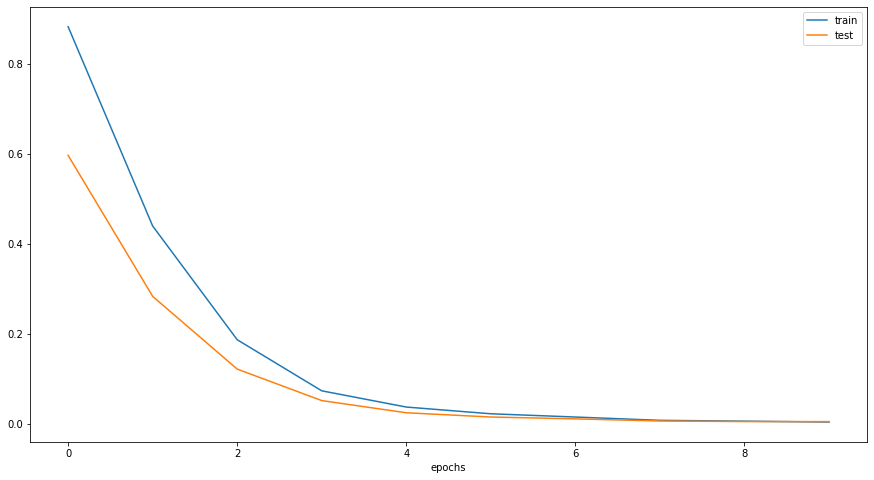

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1 (Dense)                   (None, 32)                448       
                                                                 
 2 (Dense)                   (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 3)                 51        
                                                                 
 softmax_6 (Softmax)         (None, 3)                 0         
                                                                 
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
5/5 [==============================] - 1s 52ms/step - loss: 0.9562 - accuracy: 0.6127 - val_loss: 0.5797 - val_accuracy: 0.8889
Epoch 2/10
5/5 [========================

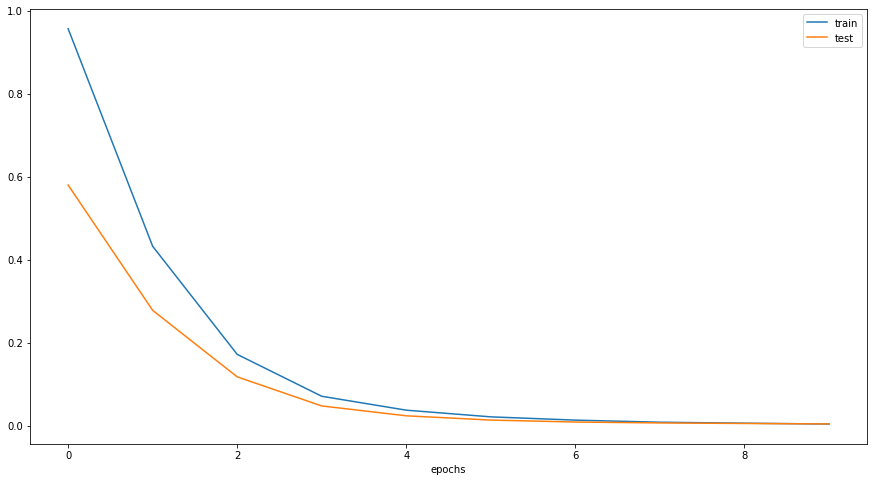

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1 (Dense)                   (None, 32)                448       
                                                                 
 2 (Dense)                   (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 3)                 51        
                                                                 
 softmax_7 (Softmax)         (None, 3)                 0         
                                                                 
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
5/5 [==============================] - 1s 52ms/step - loss: 1.0152 - accuracy: 0.5000 - val_loss: 0.6559 - val_accuracy: 0.9167
Epoch 2/20
5/5 [========================

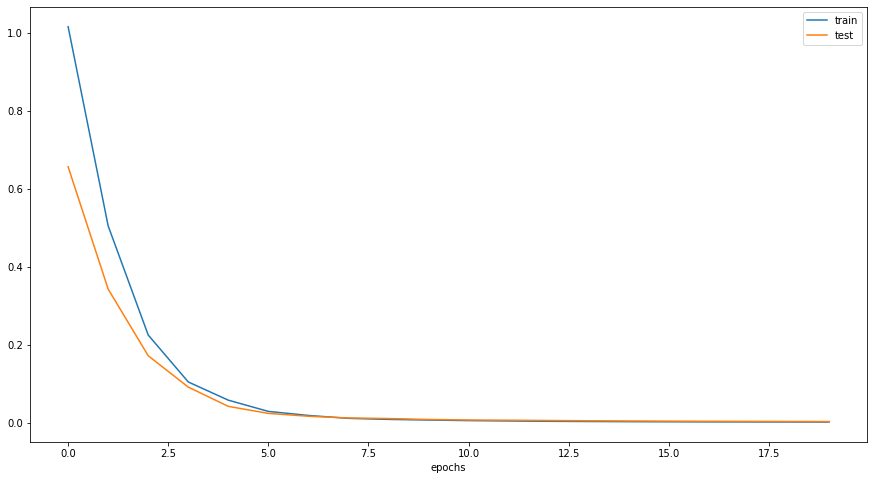

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1 (Dense)                   (None, 32)                448       
                                                                 
 2 (Dense)                   (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 3)                 51        
                                                                 
 softmax_8 (Softmax)         (None, 3)                 0         
                                                                 
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
5/5 [==============================] - 1s 52ms/step - loss: 0.9540 - accuracy: 0.5845 - val_loss: 0.6252 - val_accuracy: 0.8611
Epoch 2/20
5/5 [========================

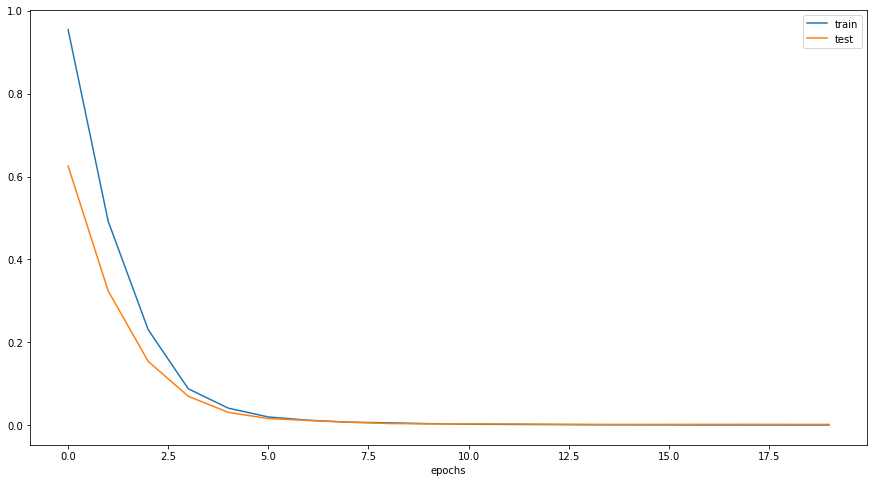

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1 (Dense)                   (None, 32)                448       
                                                                 
 2 (Dense)                   (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 3)                 51        
                                                                 
 softmax_9 (Softmax)         (None, 3)                 0         
                                                                 
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
5/5 [==============================] - 1s 52ms/step - loss: 1.1769 - accuracy: 0.4507 - val_loss: 1.2107 - val_accuracy: 0.3889
Epoch 2/5
5/5 [==========================

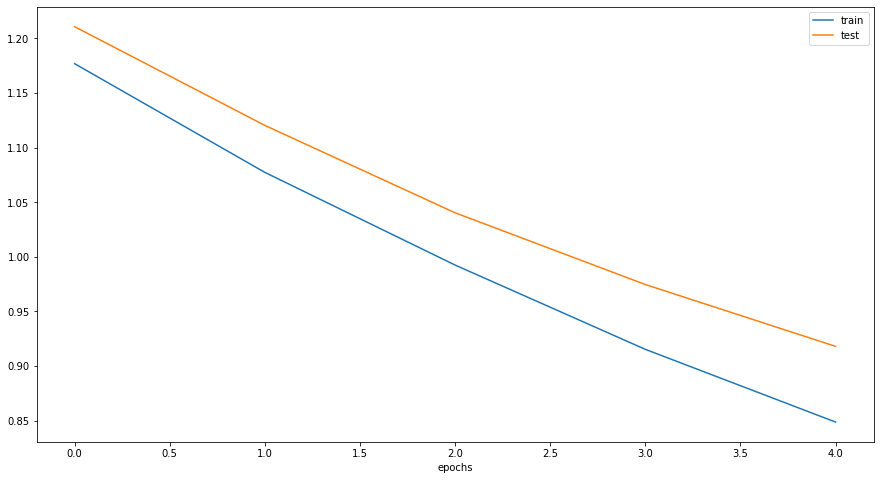

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1 (Dense)                   (None, 32)                448       
                                                                 
 2 (Dense)                   (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 3)                 51        
                                                                 
 softmax_10 (Softmax)        (None, 3)                 0         
                                                                 
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
5/5 [==============================] - 1s 59ms/step - loss: 1.0601 - accuracy: 0.4225 - val_loss: 1.0119 - val_accuracy: 0.5556
Epoch 2/5
5/5 [=========================

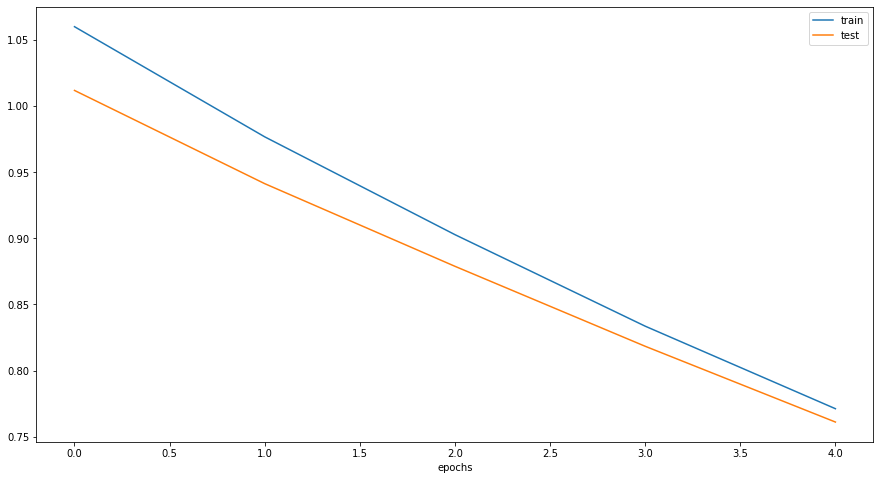

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1 (Dense)                   (None, 32)                448       
                                                                 
 2 (Dense)                   (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 3)                 51        
                                                                 
 softmax_11 (Softmax)        (None, 3)                 0         
                                                                 
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
5/5 [==============================] - 1s 59ms/step - loss: 1.5209 - accuracy: 0.3803 - val_loss: 1.2414 - val_accuracy: 0.5556
Epoch 2/10
5/5 [=======================

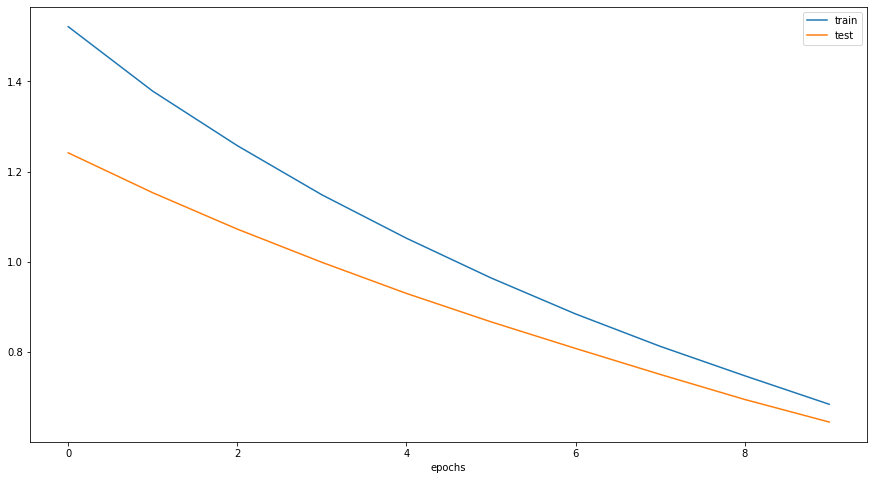

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1 (Dense)                   (None, 32)                448       
                                                                 
 2 (Dense)                   (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 3)                 51        
                                                                 
 softmax_12 (Softmax)        (None, 3)                 0         
                                                                 
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
5/5 [==============================] - 1s 56ms/step - loss: 1.0232 - accuracy: 0.4577 - val_loss: 0.9980 - val_accuracy: 0.4722
Epoch 2/10
5/5 [=======================

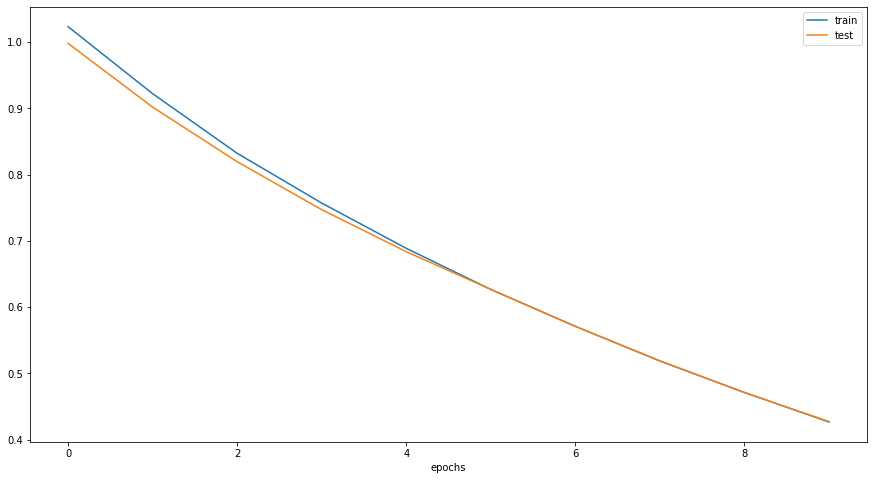

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1 (Dense)                   (None, 32)                448       
                                                                 
 2 (Dense)                   (None, 16)                528       
                                                                 
 dense_13 (Dense)            (None, 3)                 51        
                                                                 
 softmax_13 (Softmax)        (None, 3)                 0         
                                                                 
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
5/5 [==============================] - 1s 56ms/step - loss: 1.2429 - accuracy: 0.3028 - val_loss: 1.1840 - val_accuracy: 0.3056
Epoch 2/20
5/5 [=======================

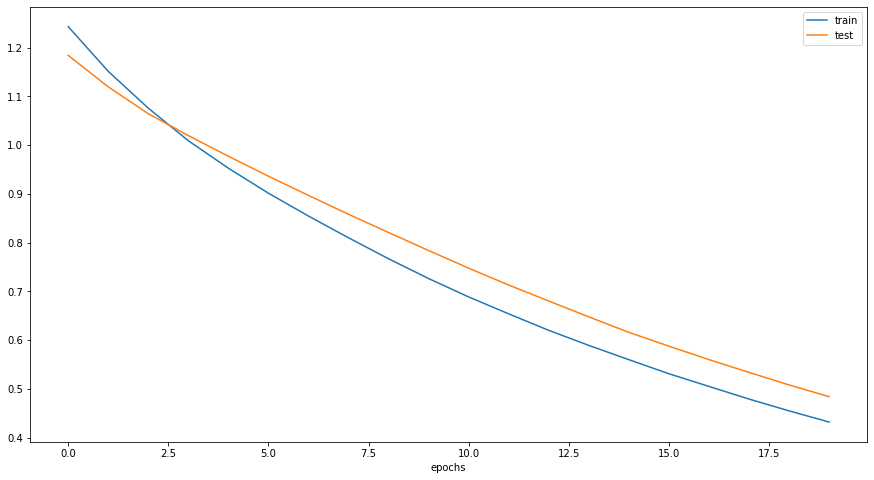

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1 (Dense)                   (None, 32)                448       
                                                                 
 2 (Dense)                   (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 3)                 51        
                                                                 
 softmax_14 (Softmax)        (None, 3)                 0         
                                                                 
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
5/5 [==============================] - 1s 55ms/step - loss: 1.1639 - accuracy: 0.3521 - val_loss: 1.1090 - val_accuracy: 0.2778
Epoch 2/20
5/5 [=======================

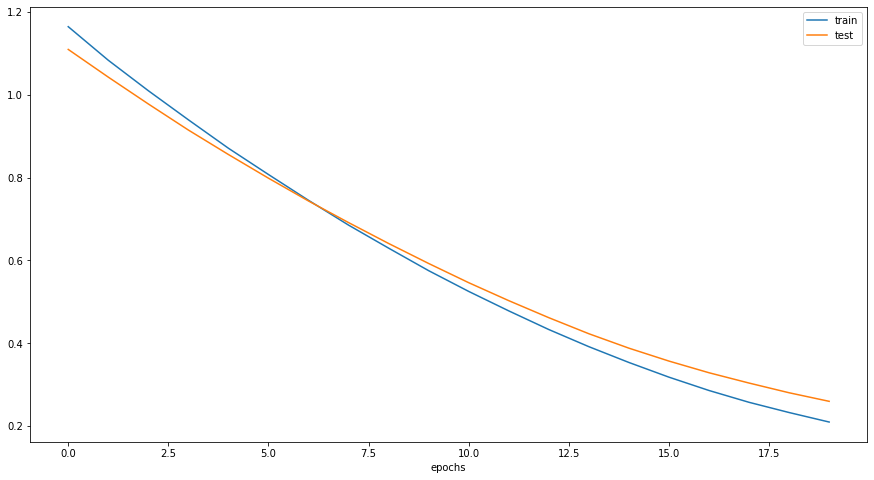

In [40]:
#funkcja która od razu stworzy wiele modeli
models = []
for lr in range(len(learning_rate)):
    for ep in epochs:
        for pt in patience:
            optimizer = tf.keras.optimizers.Adam(learning_rate= learning_rate[lr])
            model = create_model(x_train, [32,16], optimizer, 3)
         

            history = model.fit(
                x_train, 
                y_train,
                epochs = ep,
                validation_data = (x_test, y_test)
            )
            model.predict(x_test)
            y_pred=model.predict(x_test).argmax(axis=1)
            print(classification_report(y_test.argmax(axis=1), y_pred))
            report = classification_report(y_test.argmax(axis=1), y_pred, output_dict=True )
            plt.figure(figsize= (15,8))
            plt.plot(history.history['loss'], label = 'train')
            plt.plot(history.history['val_loss'], label = 'test')
            plt.xlabel('epochs')
            plt.legend()
            plt.show()
            models.append(
                {"learning rate":lr, 
                 "epochs": ep, 
                 "patience": pt, 
                 "accuracy" : report['accuracy'],
                 "precision": report['macro avg']['precision'], 
                 "recall": report['macro avg']['recall'],
                 "f1" : report['macro avg']['f1-score']
                }
            )